# Cavité disque

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import meep as mp

mp.quiet(False)

In [15]:
# Set up the cavity
r = 1
pml = 0.1
pad = 0.3
n = 1.5
sxy = 2*(r + pml + pad)
#len_scale = 20  #micrometer

resolutions = 140
cell = mp.Vector3(sxy, sxy, 0)

#geometry
geometry = [mp.Cylinder(radius = r, material = mp.Medium(index=n))]

#PML
pml_layers= [mp.PML(pml)]

#source
#wl = 0.73
#fcen = len_scale/wl
fcen =  4.6
df = 2

pos_x = 0.8
pos_y = 0.5
src_centers = [mp.Vector3(-pos_x,pos_y), mp.Vector3(pos_x,pos_y), 
               mp.Vector3(pos_x,-pos_y), mp.Vector3(-pos_x,-pos_y)]
src_size = mp.Vector3(0)
src_amps = [1,-1,1,-1]
src_compt = mp.Ez

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[0], src_size, src_amps[0]),
        mp.Source(mp.GaussianSource(fcen, fwidth=df), src_compt, src_centers[1], src_size, src_amps[0])]

#simulation
sim = mp.Simulation(cell_size = cell,
                    symmetries= [mp.Mirror(mp.X)],
                    geometry = geometry,
                    boundary_layers=pml_layers,
                    resolution=resolutions,
                    sources= src,)


<IPython.core.display.Javascript object>


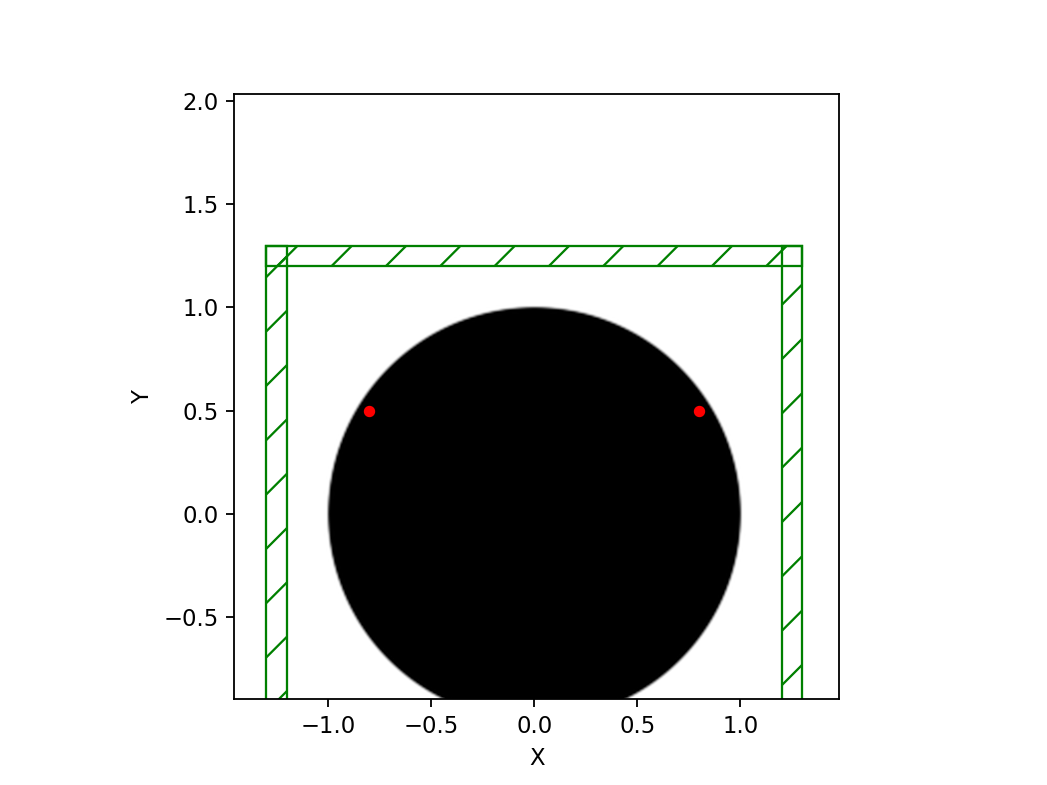

-----------
Initializing structure...
Halving computational cell along direction x
time for choose_chunkdivision = 0.00133395 s
Working in 2D dimensions.
Computational cell is 2.6 x 2.6 x 0 with resolution 100
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.100849 s
-----------


In [16]:
f = plt.figure(dpi = 150)
sim.plot2D(ax = f.gca())
plt.show()

In [3]:
# define step function to collect field Ez
def append_fields(sim):
    box = mp.Volume(center=pt_observed, size=mp.Vector3(0,0))
    ez_fields.append(sim.get_array(vol=box, component=mp.Ez))
    

In [16]:
sim.reset_meep()
ez_fields = []
pt_observed = mp.Vector3(-0.7,0.6)
#h = mp.Harminv(mp.Ez, pt_observed, fcen, df, 2000)
sim.run(mp.after_sources(append_fields),
        #mp.after_sources(h),
        until_after_sources = 4000)

-----------
Initializing structure...
Halving computational cell along direction x
time for choose_chunkdivision = 0.000828981 s
Working in 2D dimensions.
Computational cell is 2.8 x 2.8 x 0 with resolution 140
     cylinder, center = (0,0,0)
          radius 1, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.179859 s
-----------


FloatProgress(value=0.0, description='0% done ', max=4005.0)

Meep progress: 42.46071428571428/4005.0 = 1.1% done in 4.0s, 373.3s to go
on time step 11907 (time=42.525), 0.00033594 s/step
Meep progress: 84.05357142857143/4005.0 = 2.1% done in 8.0s, 373.2s to go
on time step 23554 (time=84.1214), 0.000343451 s/step
Meep progress: 125.55/4005.0 = 3.1% done in 12.0s, 370.8s to go
on time step 35175 (time=125.625), 0.00034423 s/step
Meep progress: 167.35357142857143/4005.0 = 4.2% done in 16.0s, 366.9s to go
on time step 46882 (time=167.436), 0.000341704 s/step
Meep progress: 209.04999999999998/4005.0 = 5.2% done in 20.0s, 363.2s to go
on time step 58558 (time=209.136), 0.000342584 s/step
Meep progress: 251.0142857142857/4005.0 = 6.3% done in 24.0s, 358.9s to go
on time step 70310 (time=251.107), 0.000340389 s/step
Meep progress: 292.5357142857143/4005.0 = 7.3% done in 28.0s, 355.4s to go
on time step 81939 (time=292.639), 0.000343994 s/step
Meep progress: 334.3464285714286/4005.0 = 8.3% done in 32.0s, 351.3s to go
on time step 93647 (time=334.454), 0

Meep progress: 2661.0392857142856/4005.0 = 66.4% done in 260.0s, 131.3s to go
on time step 745220 (time=2661.5), 0.000345276 s/step
Meep progress: 2702.660714285714/4005.0 = 67.5% done in 264.0s, 127.2s to go
on time step 756874 (time=2703.12), 0.000343248 s/step
Meep progress: 2743.942857142857/4005.0 = 68.5% done in 268.0s, 123.2s to go
on time step 768436 (time=2744.41), 0.000345975 s/step
Meep progress: 2785.5964285714285/4005.0 = 69.6% done in 272.0s, 119.1s to go
on time step 780100 (time=2786.07), 0.000342958 s/step
Meep progress: 2827.235714285714/4005.0 = 70.6% done in 276.0s, 115.0s to go
on time step 791763 (time=2827.72), 0.000342992 s/step
Meep progress: 2868.842857142857/4005.0 = 71.6% done in 280.0s, 110.9s to go
on time step 803413 (time=2869.33), 0.000343371 s/step
Meep progress: 2910.4392857142857/4005.0 = 72.7% done in 284.0s, 106.8s to go
on time step 815060 (time=2910.93), 0.000343461 s/step
Meep progress: 2951.557142857143/4005.0 = 73.7% done in 288.0s, 102.8s to 

<IPython.core.display.Javascript object>


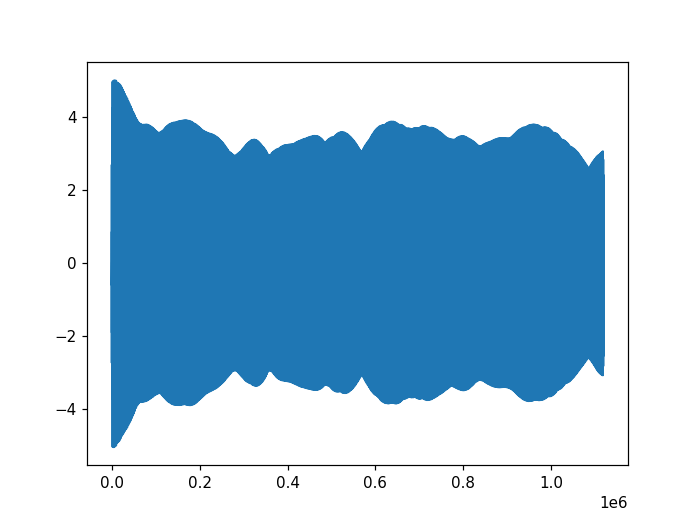

In [17]:
plt.figure()
plt.plot(ez_fields)
plt.show()

In [18]:
np.savez('ez_pair_f4.6_df2_t4000_res140', ez_fields)